# Datasets

The attached file contains two data sets:

·         Sales Data: gross mutual fund sales for Homemade Funds by dealers across selected metropolitan areas over a given period. Homemade Funds sales are comprised of financial advisors investing in various funds available to them.

·         Region Data: Zillow Home Value Index and measures the value of homes in different regions across the country. More info is available at www.zillow.com  

 

Questions

Using the sales dataset:

1.      Create a function (in any language) which will identify outliers

o   Describe the outlier function and types of outliers you are interested in identifying

2.      Based on your observations, what do you think code means?

3.      What is the relationship between homemade sales and global sales?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# renamed xlsx file to CG_case_study
funds_data = pd.read_excel("CG_case_study.xlsx", "SalesData")

In [4]:
pd.options.display.max_rows = 8
funds_data

,Code,Dealer,STATE,METRO,MORNINGSTAR_FUND_CAT1,MORNINGSTAR_FUND_CAT2,HomeMade_RTL_SALES,Global_MF_SALES
0,103,Dealer 1,CA,San Francisco-Oakland-Hayward CA,Allocation,US OE Aggressive Allocation,287.496,1737.480
1,103,Dealer 1,CA,San Francisco-Oakland-Hayward CA,Allocation,US OE Conservative Allocation,0.000,75075.000
2,103,Dealer 1,CA,San Francisco-Oakland-Hayward CA,Allocation,US OE Moderate Allocation,2000.358,11901.790
3,103,Dealer 1,CA,San Francisco-Oakland-Hayward CA,Allocation,US OE World Allocation,7506.232,38736.160
...,...,...,...,...,...,...,...,...
150105,1536,Dealer 9,CT,New Haven-Milford CT,Tax Preferred,US OE Muni National Interm,0.000,57498.925
150106,1536,Dealer 9,CT,New Haven-Milford CT,Tax Preferred,US OE Muni National Short,0.000,21281.810
150107,1536,Dealer 9,CT,New Haven-Milford CT,Tax Preferred,US OE Muni New York Long,0.000,0.000
150108,1536,Dealer 9,CT,New Haven-Milford CT,Tax Preferred,US OE Muni Single State Long,0.000,0.000


In [ ]:
# There are two types of outliers:
#    1. Artificial (Error) / Non-natural outliers
#    2. Natural outliers
# interested in detecting artificial  outliers

In [5]:
funds_data.describe()

,Code,HomeMade_RTL_SALES,Global_MF_SALES
count,150109.000000,1.501090e+05,1.501090e+05
mean,566.029325,2.660449e+03,1.005701e+05
std,607.395226,2.045040e+04,5.662257e+05
min,103.000000,-2.899280e+04,-1.448390e+05
25%,141.000000,0.000000e+00,4.677000e+01
50%,176.000000,0.000000e+00,3.914940e+03
75%,1222.000000,0.000000e+00,3.866679e+04
max,1661.000000,1.549892e+06,9.465031e+07


In [6]:
# data exploration indicates high volume of cells with missing values (converted to 0 in pd df)
# Will take average of unique 'code' and replace 0 cells with unique code's avg home sale value.
funds_data[funds_data.HomeMade_RTL_SALES == 0].count()

Code                     114390
Dealer                   114390
STATE                    114390
METRO                    114390
MORNINGSTAR_FUND_CAT1    114390
MORNINGSTAR_FUND_CAT2    114390
HomeMade_RTL_SALES       114390
Global_MF_SALES          114390
dtype: int64

In [7]:
# data exploration indicates multiple cells with missing values (converted to 0 in pd df) 
# Will take average of unique 'code' and replace 0 cells with unique code's avg global sale value. 
funds_data[funds_data.Global_MF_SALES == 0].count()

Code                     34320
Dealer                   34320
STATE                    34320
METRO                    34320
MORNINGSTAR_FUND_CAT1    34320
MORNINGSTAR_FUND_CAT2    34320
HomeMade_RTL_SALES       34320
Global_MF_SALES          34320
dtype: int64

//anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


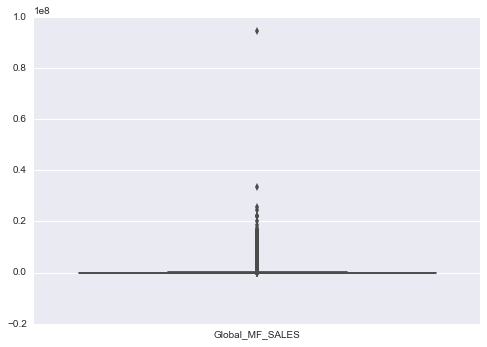

In [8]:
# extreem/missing values are causing high variation in the data
import seaborn as sns 
sns.boxplot(pd.DataFrame(funds_data['Global_MF_SALES']))
sns.despine()
# or could use: plt.boxplot(funds_data['Global_MF_SALES'], 0, 'gD') or np.log(funds_data['Global_MF_SALES']).plot(kind = 'box')

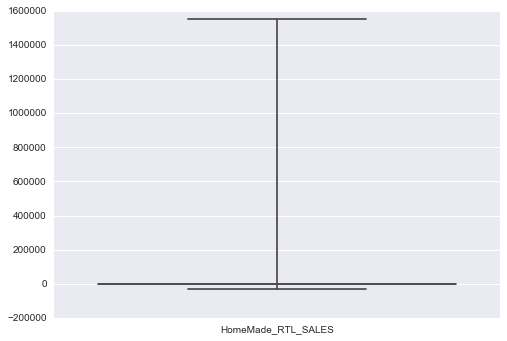

In [9]:
# extreem/missing values are causing high variation in the data
import seaborn as sns 
sns.boxplot(pd.DataFrame(funds_data['HomeMade_RTL_SALES']))
sns.despine()

# Connecting SQL 

In [17]:
dfs = [funds_data]
names = ['funds_data']

In [18]:
funds_data.columns

Index([u'Code', u'Dealer', u'STATE', u'METRO', u'MORNINGSTAR_FUND_CAT1',
       u'MORNINGSTAR_FUND_CAT2', u'HomeMade_RTL_SALES', u'Global_MF_SALES'],
      dtype='object')

In [19]:
import sqlite3 as sql
import sys 

In [20]:
for name,df in zip(names,dfs):
    with sql.connect('funds.db') as conn:
        conn.text_factory = str
        df.to_sql(name, conn, flavor='sqlite',if_exists='replace',index=False)
c = conn.cursor()        

# HOME: Imputing missing values

In [21]:
c.execute("""DROP TABLE avg_funds_data_test""")

In [22]:
# Finding avg of unique 'Code', dealer' and 'Metro' to replace 0 cells with this avg value.
c.execute("""Create table avg_funds_data_test as 
          SELECT DISTINCT(Code) AS Code, Dealer,
          AVG(HomeMade_RTL_SALES) AS avg_homesales,
          AVG(Global_MF_SALES) AS avg_globalsales
          FROM funds_data
          GROUP BY Code, Dealer""")


In [23]:
pd.options.display.max_rows = 10
c.execute("""SELECT * FROM avg_funds_data_test""")
names = [description[0] for description in c.description]
print names
data = c.fetchall()
avg_funds_data = pd.DataFrame(data)
avg_funds_data

['Code', 'Dealer', 'avg_homesales', 'avg_globalsales']


,0,1,2,3
0,103,Dealer 1,2465.533932,3.307991e+04
1,103,Dealer 10,818.228080,2.679089e+04
2,103,Dealer 11,388.692491,1.891360e+05
3,103,Dealer 12,303.829545,8.061465e+03
4,103,Dealer 13,311.485257,1.327767e+04
...,...,...,...,...
1063,1661,Dealer 19,27567.277278,4.579651e+06
1064,1661,Dealer 2,1210.758864,4.358199e+04
1065,1661,Dealer 24,20508.785063,1.897637e+06
1066,1661,Dealer 29,4798.113155,9.183563e+05


In [24]:
c.execute("""DROP TABLE funds_data_duplicate""")

In [25]:
#duplicating funds_data
c.execute("""CREATE TABLE funds_data_duplicate AS
             SELECT * FROM funds_data""")

In [26]:
c.execute("""DROP TABLE funds_merged_home_test""")

In [27]:
c.execute("""CREATE TABLE funds_merged_home_test AS
            SELECT * FROM funds_data_duplicate AS fdd
            LEFT JOIN avg_funds_data_test AS afd
            ON fdd.Code = afd.Code 
            AND fdd.Dealer = afd.Dealer
            """)

In [28]:
c.execute("""SELECT * FROM funds_merged_home_test""")
names = [description[0] for description in c.description]
print names
data = c.fetchall()
pd.DataFrame(data)

['Code', 'Dealer', 'STATE', 'METRO', 'MORNINGSTAR_FUND_CAT1', 'MORNINGSTAR_FUND_CAT2', 'HomeMade_RTL_SALES', 'Global_MF_SALES', 'Code:1', 'Dealer:1', 'avg_homesales', 'avg_globalsales']


,0,1,2,3,4,5,6,7,8,9,10,11
0,103,Dealer 1,CA,San Francisco-Oakland-Hayward CA,Allocation,US OE Aggressive Allocation,287.496,1737.480,103,Dealer 1,2465.533932,33079.912055
1,103,Dealer 1,CA,San Francisco-Oakland-Hayward CA,Allocation,US OE Conservative Allocation,0.000,75075.000,103,Dealer 1,2465.533932,33079.912055
2,103,Dealer 1,CA,San Francisco-Oakland-Hayward CA,Allocation,US OE Moderate Allocation,2000.358,11901.790,103,Dealer 1,2465.533932,33079.912055
3,103,Dealer 1,CA,San Francisco-Oakland-Hayward CA,Allocation,US OE World Allocation,7506.232,38736.160,103,Dealer 1,2465.533932,33079.912055
4,103,Dealer 1,CA,San Francisco-Oakland-Hayward CA,Alternative,US OE Long/Short Equity,0.000,0.000,103,Dealer 1,2465.533932,33079.912055
...,...,...,...,...,...,...,...,...,...,...,...,...
150104,1536,Dealer 9,CT,New Haven-Milford CT,Tax Preferred,US OE High Yield Muni,0.000,2498.925,1536,Dealer 9,895.004260,13745.141923
150105,1536,Dealer 9,CT,New Haven-Milford CT,Tax Preferred,US OE Muni National Interm,0.000,57498.925,1536,Dealer 9,895.004260,13745.141923
150106,1536,Dealer 9,CT,New Haven-Milford CT,Tax Preferred,US OE Muni National Short,0.000,21281.810,1536,Dealer 9,895.004260,13745.141923
150107,1536,Dealer 9,CT,New Haven-Milford CT,Tax Preferred,US OE Muni New York Long,0.000,0.000,1536,Dealer 9,895.004260,13745.141923


In [29]:
c.execute("""UPDATE funds_merged_home_test
             SET HomeMade_RTL_SALES = avg_homesales
             WHERE HomeMade_RTL_SALES == '0.000' 
             """)

In [30]:
# imputed average of unique 'code' and replaced 0 "HomeMade_RTL_SALES" cells with unique code's avg_homesales value.
c.execute("""SELECT Code, Dealer, HomeMade_RTL_SALES, avg_homesales, Global_MF_SALES, avg_globalsales
             FROM funds_merged_home_test""")
names = [description[0] for description in c.description]
print names
data = c.fetchall()
funds_merged_home_df = pd.DataFrame(data, columns = ['Code', 'Dealer','HomeMade_RTL_SALES', 'avg_homesales', 'Global_MF_SALES', 'avg_globalsales'])
funds_merged_home_df

['Code', 'Dealer', 'HomeMade_RTL_SALES', 'avg_homesales', 'Global_MF_SALES', 'avg_globalsales']


,Code,Dealer,HomeMade_RTL_SALES,avg_homesales,Global_MF_SALES,avg_globalsales
0,103,Dealer 1,287.496000,2465.533932,1737.480,33079.912055
1,103,Dealer 1,2465.533932,2465.533932,75075.000,33079.912055
2,103,Dealer 1,2000.358000,2465.533932,11901.790,33079.912055
3,103,Dealer 1,7506.232000,2465.533932,38736.160,33079.912055
4,103,Dealer 1,2465.533932,2465.533932,0.000,33079.912055
...,...,...,...,...,...,...
150104,1536,Dealer 9,895.004260,895.004260,2498.925,13745.141923
150105,1536,Dealer 9,895.004260,895.004260,57498.925,13745.141923
150106,1536,Dealer 9,895.004260,895.004260,21281.810,13745.141923
150107,1536,Dealer 9,895.004260,895.004260,0.000,13745.141923


# Global: Imputing missing values

In [31]:
c.execute("""DROP TABLE funds_merged_global""")

In [32]:
c.execute("""CREATE TABLE funds_merged_global AS
            SELECT * FROM funds_data_duplicate AS fdd
            LEFT JOIN avg_funds_data_test AS afd
            ON fdd.Code = afd.Code
            AND fdd.Dealer = afd.Dealer
            """)

In [33]:
c.execute("""UPDATE funds_merged_global
            SET Global_MF_SALES = avg_globalsales
             WHERE Global_MF_SALES == '0.000'
             """)

In [34]:
# imputed average of unique 'code' and replaced 0 "Global_MF_SALES" cells with unique code's avg_homesales value.
c.execute("""SELECT Code, Dealer, Global_MF_SALES, avg_globalsales,  HomeMade_RTL_SALES, avg_homesales 
             FROM funds_merged_global""")
names = [description[0] for description in c.description]
print names
data = c.fetchall()
funds_merged_global_df = pd.DataFrame(data, columns = ['Code', 'Dealer','Global_MF_SALES', 'avg_globalsales', 'HomeMade_RTL_SALES', 'avg_homesales'])
funds_merged_global_df

['Code', 'Dealer', 'Global_MF_SALES', 'avg_globalsales', 'HomeMade_RTL_SALES', 'avg_homesales']


,Code,Dealer,Global_MF_SALES,avg_globalsales,HomeMade_RTL_SALES,avg_homesales
0,103,Dealer 1,1737.480000,33079.912055,287.496,2465.533932
1,103,Dealer 1,75075.000000,33079.912055,0.000,2465.533932
2,103,Dealer 1,11901.790000,33079.912055,2000.358,2465.533932
3,103,Dealer 1,38736.160000,33079.912055,7506.232,2465.533932
4,103,Dealer 1,33079.912055,33079.912055,0.000,2465.533932
...,...,...,...,...,...,...
150104,1536,Dealer 9,2498.925000,13745.141923,0.000,895.004260
150105,1536,Dealer 9,57498.925000,13745.141923,0.000,895.004260
150106,1536,Dealer 9,21281.810000,13745.141923,0.000,895.004260
150107,1536,Dealer 9,13745.141923,13745.141923,0.000,895.004260


# Combining data into one excel for #2 question 

In [35]:
c.execute("""SELECT Code, Dealer, Global_MF_SALES 
             FROM funds_merged_global""")
names = [description[0] for description in c.description]
print names
data = c.fetchall()
global_df = pd.DataFrame(data, columns = ['Code', 'Dealer','Global_MF_SALES'])
global_df

['Code', 'Dealer', 'Global_MF_SALES']


,Code,Dealer,Global_MF_SALES
0,103,Dealer 1,1737.480000
1,103,Dealer 1,75075.000000
2,103,Dealer 1,11901.790000
3,103,Dealer 1,38736.160000
4,103,Dealer 1,33079.912055
...,...,...,...
150104,1536,Dealer 9,2498.925000
150105,1536,Dealer 9,57498.925000
150106,1536,Dealer 9,21281.810000
150107,1536,Dealer 9,13745.141923


In [97]:
from pandas import ExcelWriter
writer_glob = ExcelWriter('log_global_data_update.xlsx')
global_df.to_excel(writer_glob,'Sheet1')
writer_glob.save()

In [36]:
c.execute("""SELECT Code, Dealer, HomeMade_RTL_SALES
             FROM funds_merged_home_test""")
names = [description[0] for description in c.description]
print names
data = c.fetchall()
home_df = pd.DataFrame(data, columns = ['Code', 'Dealer','HomeMade_RTL_SALES'])
home_df

['Code', 'Dealer', 'HomeMade_RTL_SALES']


,Code,Dealer,HomeMade_RTL_SALES
0,103,Dealer 1,287.496000
1,103,Dealer 1,2465.533932
2,103,Dealer 1,2000.358000
3,103,Dealer 1,7506.232000
4,103,Dealer 1,2465.533932
...,...,...,...
150104,1536,Dealer 9,895.004260
150105,1536,Dealer 9,895.004260
150106,1536,Dealer 9,895.004260
150107,1536,Dealer 9,895.004260


In [98]:
writer = ExcelWriter('log_home_data_update.xlsx')
home_df.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
# Below command kept timing out. Manually combined log_home_data.xlsx, log_global_data.xlsx in a duplicate excel aka "CG_case_study_updated"
#pd.concat(home_df,global_df)

# Observing data after replacing 0s with average value

In [37]:
funds_merged_home_df.describe()

,Code,HomeMade_RTL_SALES,avg_homesales,Global_MF_SALES,avg_globalsales
count,150109.000000,1.501090e+05,150109.000000,1.501090e+05,1.501090e+05
mean,566.029325,4.536681e+03,2660.448962,1.005701e+05,1.005701e+05
std,607.395226,2.051601e+04,4081.284430,5.662257e+05,2.010648e+05
min,103.000000,-2.899280e+04,0.000000,-1.448390e+05,0.000000e+00
25%,141.000000,3.131462e+02,431.244493,4.677000e+01,2.180829e+04
50%,176.000000,1.193570e+03,1298.404080,3.914940e+03,5.253420e+04
75%,1222.000000,3.098600e+03,2979.594318,3.866679e+04,1.129728e+05
max,1661.000000,1.549892e+06,38001.557290,9.465031e+07,4.579651e+06


In [38]:
# missing data still exists, so will drop these rows as they are minimal amount compaired to 
# entire data set
funds_merged_home_df[funds_merged_home_df.HomeMade_RTL_SALES == 0].count()

Code                  2520
Dealer                2520
HomeMade_RTL_SALES    2520
avg_homesales         2520
Global_MF_SALES       2520
avg_globalsales       2520
dtype: int64

In [43]:
# droping rows w 0 in HomeMade_RTL_SALES
# 150109 - 2520 = 147589 rows
funds_merged_home_df = funds_merged_home_df[funds_merged_home_df['HomeMade_RTL_SALES'] != 0]
funds_merged_home_df.count()

Code                  147589
Dealer                147589
HomeMade_RTL_SALES    147589
avg_homesales         147589
Global_MF_SALES       147589
avg_globalsales       147589
dtype: int64

In [44]:
funds_merged_global_df.describe()

,Code,Global_MF_SALES,avg_globalsales,HomeMade_RTL_SALES,avg_homesales
count,150109.000000,1.501090e+05,1.501090e+05,1.501090e+05,150109.000000
mean,566.029325,1.189397e+05,1.005701e+05,2.660449e+03,2660.448962
std,607.395226,5.676261e+05,2.010648e+05,2.045040e+04,4081.284430
min,103.000000,-1.448390e+05,0.000000e+00,-2.899280e+04,0.000000
25%,141.000000,2.871300e+03,2.180829e+04,0.000000e+00,431.244493
50%,176.000000,1.947231e+04,5.253420e+04,0.000000e+00,1298.404080
75%,1222.000000,7.606158e+04,1.129728e+05,0.000000e+00,2979.594318
max,1661.000000,9.465031e+07,4.579651e+06,1.549892e+06,38001.557290


In [45]:
# missing data still exists, so will drop these rows as they are minimal amount compaired to 
# entire data set
funds_merged_global_df[funds_merged_global_df.Global_MF_SALES == 0].count()

Code                  10
Dealer                10
Global_MF_SALES       10
avg_globalsales       10
HomeMade_RTL_SALES    10
avg_homesales         10
dtype: int64

In [46]:
# droping rows w 0 in Global_MF_SALES
# 150109 - 10 = 150099 rows
funds_merged_global_df = funds_merged_global_df[funds_merged_global_df['Global_MF_SALES'] != 0]
funds_merged_global_df.count()

Code                  150099
Dealer                150099
Global_MF_SALES       150099
avg_globalsales       150099
HomeMade_RTL_SALES    150099
avg_homesales         150099
dtype: int64

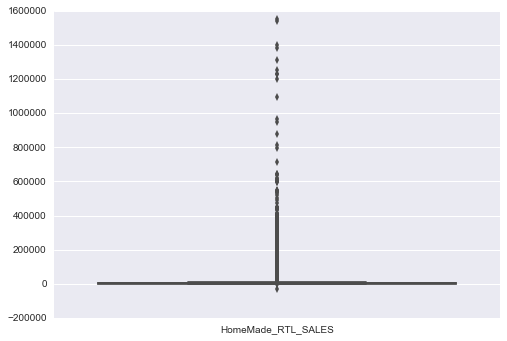

In [61]:
# A lot of variation due to extreem values still exists ...
sns.boxplot(pd.DataFrame(funds_merged_home_df['HomeMade_RTL_SALES']))

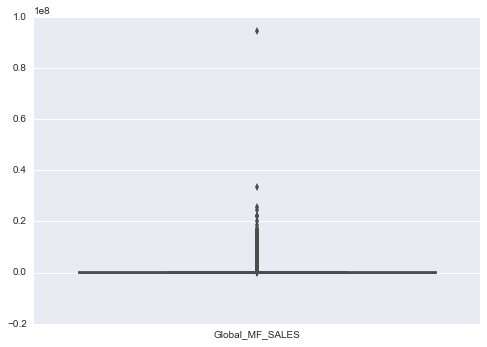

In [62]:
# A lot of variation due to extreem values still exists ...
sns.boxplot(pd.DataFrame(funds_merged_global_df['Global_MF_SALES']))

In [50]:
# Natural log of a value reduces the variation caused by extreme values.
np.log(funds_merged_home_df['HomeMade_RTL_SALES']).describe()

count    147569.000000
mean          6.889316
std           1.890080
min          -5.298317
25%           5.830705
50%           7.129282
75%           8.056297
max          14.253696
Name: HomeMade_RTL_SALES, dtype: float64

In [51]:
# Natural log of a value reduces the variation caused by extreme values.
np.log(funds_merged_global_df['Global_MF_SALES']).describe()

count    149995.000000
mean          9.458374
std           2.524992
min          -5.298317
25%           7.967929
50%           9.879532
75%          11.239298
max          18.365700
Name: Global_MF_SALES, dtype: float64

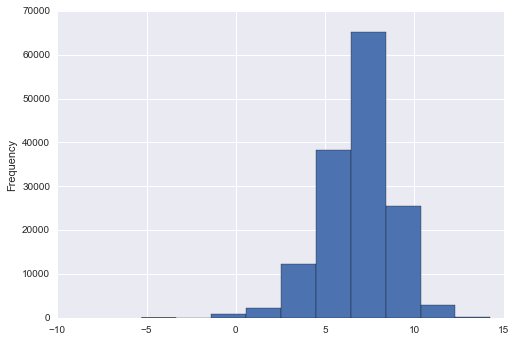

In [52]:
# hist. shows data is more normally distributed. Now can detect outliers.
np.log(funds_merged_home_df['HomeMade_RTL_SALES']).plot(kind = "hist")

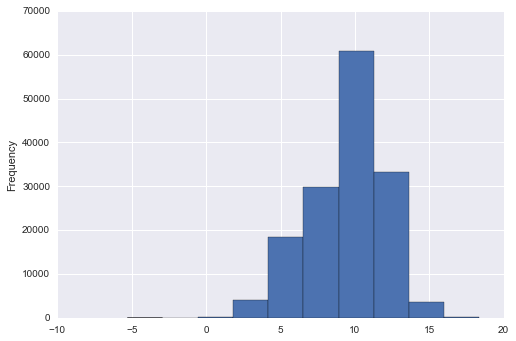

In [53]:
# hist. shows data is more normally distributed. Now can detect outliers.
np.log(funds_merged_global_df['Global_MF_SALES']).plot(kind = "hist")

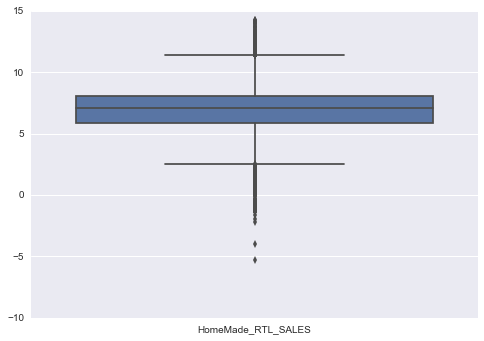

In [54]:
# Determining an outlier to be any value, beyond the range of -1.5 x IQR to 1.5 x IQR
import seaborn as sns 
sns.boxplot(pd.DataFrame(np.log(funds_merged_home_df['HomeMade_RTL_SALES'])), whis=1.5)

In [55]:
                                    # HomeMade Sale (log)

Q3 = 8.056297
Q1 = 5.830705
# Interquartile Range: 
IQR = Q3 - Q1

# outliers: 
below = Q1 - 1.5*(IQR) 
above = Q3 + 1.5*(IQR)

print "HomeMade Sale Outliers:"
print "IQR =", IQR
print "outliers <", below
print "outliers >", above 

HomeMade Sale Outliers:
IQR = 2.225592
outliers < 2.492317
outliers > 11.394685


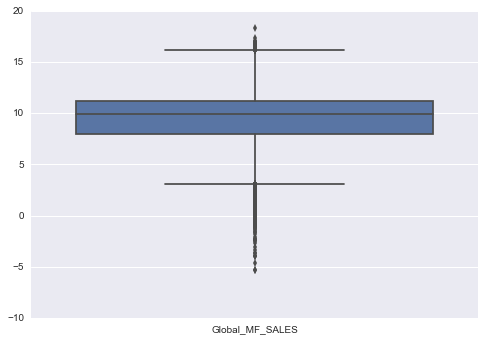

In [56]:
# Determining an outlier to be any value, beyond the range of -1.5 x IQR to 1.5 x IQR
sns.boxplot(pd.DataFrame(np.log(funds_merged_global_df['Global_MF_SALES'])), whis=1.5)

In [57]:
                                    # Global Sale (log)

Q3 = 11.239298
Q1 = 7.967929
# Interquartile Range: 
IQR = Q3 - Q1

# outliers: 
below = Q1 - 1.5*(IQR) 
above = Q3 + 1.5*(IQR)

print "Global Sale Outliers:"
print "IQR =", IQR
print "outliers <", below
print "outliers >", above 

Global Sale Outliers:
IQR = 3.271369
outliers < 3.0608755
outliers > 16.1463515


# Interpretation of Code

In [171]:
# Code is a unique identifier that represents a distinct Dealer + State/Metro combination.

# Relationship between Home and Global Sales

In [58]:
log_home = np.log(funds_merged_home_df['HomeMade_RTL_SALES'])
log_global = np.log(funds_merged_global_df['Global_MF_SALES'])

In [59]:
# a positive but low correlation ( person's r = 0.365) exists between global and home sales
df1=pd.DataFrame( {'HomeMade':log_home, 
                   'Global':log_global})
df1.corr(method='pearson')

,Global,HomeMade
Global,1.000000,0.364852
HomeMade,0.364852,1.000000


In [178]:
#x, y = pd.Series(log_home, name="HomeMade Sale"), pd.Series(log_global, name="global Sale")
#ax = sns.regplot(x=x, y=y, marker="+")

In [179]:
#x, y = pd.Series(np.log(funds_merged_home_df['HomeMade_RTL_SALES']), name="HomeMade Sale"), pd.Series(np.log(funds_merged_global_df['Global_MF_SALES']), name="global Sale")
#ax = sns.regplot(x=x, y=y, marker="+")